In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
df_patients = pd.read_csv("../Data/dim_patients_final_rev01.csv")

In [3]:
df_visits = pd.read_csv("../Data/fact_visits_final_rev01.csv")

In [4]:
df_patients.head()

,patient_id,date_of_birth,aadhar_number,mobile_number,email,first_name,last_name,full_name,gender,height,weight,bmi,area,latitude,longitude
0,1000,1957-07-02,254734595276,912998937864,achang@example.org,Eswar,Rajendran,Mr. Eswar Rajendran,Male,165,94,34.5,Alwarpet,13.033,80.251
1,1001,1980-09-16,450990877668,913770928150,tammy76@example.com,Indra,Chokkalingam,Ms. Indra Chokkalingam,Female,151,74,32.5,Guindy,13.005,80.219
2,1002,1969-12-04,585965453521,911664078988,nhoward@example.net,Swathi,Iyyappan,Ms. Swathi Iyyappan,Female,162,88,33.5,Adyar,13.006,80.257
3,1003,1979-11-19,842467933153,911027314078,juancampos@example.net,Gopal,Palanisamy,Mr. Gopal Palanisamy,Male,179,93,29.0,Egmore,13.078,80.258
4,1004,1997-01-04,665339009112,918904122631,vanessa89@example.org,Fathima,Thirunavukkarasu,Ms. Fathima Thirunavukkarasu,Female,151,99,43.4,Nungambakkam,13.059,80.239


In [5]:
df_visits.head()

,patient_id,visited_date,sugar,hba1c,systolic_pressure,diastolic_pressure
0,1000,2023-04-19,262,12.0,126,96
1,1000,2023-08-14,301,13.3,124,83
2,1001,2023-04-13,157,6.8,102,99
3,1002,2023-04-09,445,13.5,127,97
4,1002,2023-07-24,550,12.2,105,99


In [6]:
df_patients.columns

Index(['patient_id', 'date_of_birth', 'aadhar_number', 'mobile_number',
       'email', 'first_name', 'last_name', 'full_name', 'gender', 'height',
       'weight', 'bmi', 'area', 'latitude', 'longitude'],
      dtype='object')

In [7]:
df_visits.columns

Index(['patient_id', 'visited_date', 'sugar', 'hba1c', 'systolic_pressure',
       'diastolic_pressure'],
      dtype='object')

## Data Definition

### df_patients contains the following columns
    - patinet_id - patients id 
    - date_of_birth - Date of birth of patients
    - aadhar_number - Aadhar number of patients
    - mobile_number - Mobile number of patients
    - email - Email of patients
    - first_name - first name of patients
    - full_name - full name of patients
    - gender - Gender of patients
    - height - height of patients
    - weight - weight of patients
    - area - The area in Chennai where the patient lives
    - latitude - latitude of the patient's area 
    - longitude - longitude of the patients' area
    
### df_visits contains the following columns
    - patient_id - patients id
    - visited_date - Date the patient visited the patients
    - sugar - Sugar level of the patient
    - hba1c - HBA1C level of the patient
    - systolic_pressure - Systolic blood pressure level of the patients
    - diastolic_pressure - Diastolic pressure level of the patients

## Find the mean sugar, HBA1C, blood pressure of the patients

In [8]:
# mean sugar of patients
df_visits['sugar'].mean()

309.1905066439281

In [9]:
# mean HBA1C of patients
df_visits['hba1c'].mean()

9.523257301215091

In [10]:
df_visits['systolic_pressure'].mean()

124.79585020962126

In [11]:
df_visits['diastolic_pressure'].mean()

89.99978682583671

In [12]:
df_visits.dtypes

patient_id              int64
visited_date           object
sugar                   int64
hba1c                 float64
systolic_pressure       int64
diastolic_pressure      int64
dtype: object

## Converting visited_date which is stored as a object to date using to_datetime

In [13]:
df_visits['visited_date'] = pd.to_datetime(df_visits['visited_date'])

In [14]:
df_visits.dtypes

patient_id                     int64
visited_date          datetime64[ns]
sugar                          int64
hba1c                        float64
systolic_pressure              int64
diastolic_pressure             int64
dtype: object

In [15]:
## Pandas to_datetime Documentation
## https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [16]:
df_patients.dtypes

patient_id         int64
date_of_birth     object
aadhar_number      int64
mobile_number      int64
email             object
first_name        object
last_name         object
full_name         object
gender            object
height             int64
weight             int64
bmi              float64
area              object
latitude         float64
longitude        float64
dtype: object

## Converting date_of_birth of object type to date type

In [17]:
df_patients['date_of_birth'] = pd.to_datetime(df_patients['date_of_birth'])

In [18]:
df_patients.dtypes

patient_id                int64
date_of_birth    datetime64[ns]
aadhar_number             int64
mobile_number             int64
email                    object
first_name               object
last_name                object
full_name                object
gender                   object
height                    int64
weight                    int64
bmi                     float64
area                     object
latitude                float64
longitude               float64
dtype: object

## Group By and finding mean Sugar, HBA1C, blood pressure

In [19]:
df_visits_groupbyid = df_visits.groupby('patient_id')

In [20]:
df_visits_groupbyid.mean()

,visited_date,sugar,hba1c,systolic_pressure,diastolic_pressure
patient_id,,,,,
1000,2023-06-16 12:00:00,281.500000,12.650000,125.000000,89.500000
1001,2023-04-13 00:00:00,157.000000,6.800000,102.000000,99.000000
1002,2023-09-09 06:00:00,515.250000,12.175000,114.500000,90.750000
1003,2023-04-02 00:00:00,378.000000,10.600000,107.000000,98.000000
1004,2023-07-28 16:00:00,398.666667,11.700000,121.666667,91.666667
...,...,...,...,...,...
5995,2023-07-26 16:00:00,592.666667,11.566667,123.666667,90.666667
5996,2023-04-15 00:00:00,347.000000,10.100000,121.000000,81.000000
5997,2023-04-18 00:00:00,474.000000,11.100000,152.000000,84.000000


## Finding Top 5 patients with maximum Sugar, HBA1C, Blood Pressure

In [21]:
df_visits.nlargest(5, 'sugar')

,patient_id,visited_date,sugar,hba1c,systolic_pressure,diastolic_pressure
5,1002,2023-10-30,600,10.9,131,85
12,1006,2023-04-11,600,12.4,99,93
13,1006,2023-08-02,600,13.7,146,88
24,1010,2023-04-27,600,8.1,152,85
25,1010,2023-08-12,600,10.1,119,95


In [22]:
df_visits.nlargest(5, 'hba1c')

,patient_id,visited_date,sugar,hba1c,systolic_pressure,diastolic_pressure
42,1017,2023-08-08,217,14.0,150,80
135,1050,2023-10-31,600,14.0,115,83
180,1067,2024-02-25,319,14.0,94,85
204,1077,2023-07-13,280,14.0,153,97
869,1311,2023-07-11,203,14.0,110,92


In [23]:
df_visits.nlargest(5, 'systolic_pressure')

,patient_id,visited_date,sugar,hba1c,systolic_pressure,diastolic_pressure
152,1057,2023-04-09,277,10.5,160,81
244,1092,2024-03-05,300,10.5,160,88
305,1113,2023-10-16,600,12.3,160,93
424,1154,2023-10-28,525,8.5,160,91
701,1251,2023-04-11,585,8.3,160,80


In [24]:
df_visits.nlargest(5, 'diastolic_pressure')

,patient_id,visited_date,sugar,hba1c,systolic_pressure,diastolic_pressure
50,1022,2023-11-05,372,11.5,117,100
57,1024,2023-08-21,227,10.5,126,100
68,1027,2023-04-25,395,13.2,152,100
85,1033,2023-11-27,310,11.3,120,100
86,1033,2024-03-24,385,13.4,141,100


## Grouping, cutting, binning Sugar, HBA1C, Pressure

   - For sugar the low range is between 50 to 80, normal is from 80 to 120, 120 to 160 is moderate, 160 - 200 is high, anything      above 200 is very high
   - For HBA1C 5 - 6 is normal, 6 - 8 is controlled diabetes, 8 - 10 is high, beyond 80 is very high
   - For BP systolic pressure till 110 is normal, 110 - 130 is high, beyond 130 is very high

In [25]:
sugar_bins = [50, 80, 120, 160, 200, 600]
sugar_labels = ['Low', 'Normal', 'Moderate', 'High', 'Very High']

hba1c_bins = [5, 6, 8, 10, 16]
hba1c_labels = ['Normal', 'Controlled Diabetes', 'High', 'Very High']

bp_bins = [80, 110, 130, 200]
bp_labels = ['Normal', 'High', 'Very High']

df_visits['sugar_cut'] = pd.cut(df_visits['sugar'], bins=sugar_bins, labels=sugar_labels)
df_visits['hba1c_cut'] = pd.cut(df_visits['hba1c'], bins=hba1c_bins, labels=hba1c_labels)
df_visits['bp_cut'] = pd.cut(df_visits['systolic_pressure'], bins=bp_bins, labels=bp_labels)

In [26]:
df_visits

,patient_id,visited_date,sugar,hba1c,systolic_pressure,diastolic_pressure,sugar_cut,hba1c_cut,bp_cut
0,1000,2023-04-19,262,12.0,126,96,Very High,Very High,High
1,1000,2023-08-14,301,13.3,124,83,Very High,Very High,High
2,1001,2023-04-13,157,6.8,102,99,Moderate,Controlled Diabetes,Normal
3,1002,2023-04-09,445,13.5,127,97,Very High,Very High,High
4,1002,2023-07-24,550,12.2,105,99,Very High,Very High,Normal
...,...,...,...,...,...,...,...,...,...
14068,5997,2023-04-18,474,11.1,152,84,Very High,Very High,Very High
14069,5998,2023-04-10,82,5.8,146,81,Normal,Normal,Very High
14070,5999,2023-04-06,453,11.8,96,91,Very High,Very High,Normal
14071,5999,2023-07-14,341,9.8,133,87,Very High,High,Very High


In [27]:
df_visits['sugar_cut'].value_counts()

sugar_cut
Very High    9696
Moderate     1146
High         1132
Normal       1102
Low           804
Name: count, dtype: int64

In [28]:
df_visits['hba1c_cut'].value_counts()

hba1c_cut
Very High              6399
High                   3200
Controlled Diabetes    2334
Normal                 1996
Name: count, dtype: int64

In [29]:
df_visits['bp_cut'].value_counts()

bp_cut
Very High    5898
Normal       4213
High         3962
Name: count, dtype: int64

In [30]:
## Reference article cut and qcut
## https://pbpython.com/pandas-qcut-cut.html

## Extracting month and year

In [31]:
df_visits['year'] = df_visits['visited_date'].dt.year

In [32]:
df_visits.head()

,patient_id,visited_date,sugar,hba1c,systolic_pressure,diastolic_pressure,sugar_cut,hba1c_cut,bp_cut,year
0,1000,2023-04-19,262,12.0,126,96,Very High,Very High,High,2023
1,1000,2023-08-14,301,13.3,124,83,Very High,Very High,High,2023
2,1001,2023-04-13,157,6.8,102,99,Moderate,Controlled Diabetes,Normal,2023
3,1002,2023-04-09,445,13.5,127,97,Very High,Very High,High,2023
4,1002,2023-07-24,550,12.2,105,99,Very High,Very High,Normal,2023


In [33]:
df_visits['month'] = df_visits['visited_date'].dt.month

In [34]:
df_visits.head()

,patient_id,visited_date,sugar,hba1c,systolic_pressure,diastolic_pressure,sugar_cut,hba1c_cut,bp_cut,year,month
0,1000,2023-04-19,262,12.0,126,96,Very High,Very High,High,2023,4
1,1000,2023-08-14,301,13.3,124,83,Very High,Very High,High,2023,8
2,1001,2023-04-13,157,6.8,102,99,Moderate,Controlled Diabetes,Normal,2023,4
3,1002,2023-04-09,445,13.5,127,97,Very High,Very High,High,2023,4
4,1002,2023-07-24,550,12.2,105,99,Very High,Very High,Normal,2023,7


In [35]:
## Ref article extracting month and year
## https://sparkbyexamples.com/pandas/pandas-extract-month-and-year-separately-from-datetime-column/#:~:text=Use%20pandas%20DatetimeIndex(),the%20corresponding%20month%20or%20year.

## Data Visualization

## Line Chart Month, Year, Sugar

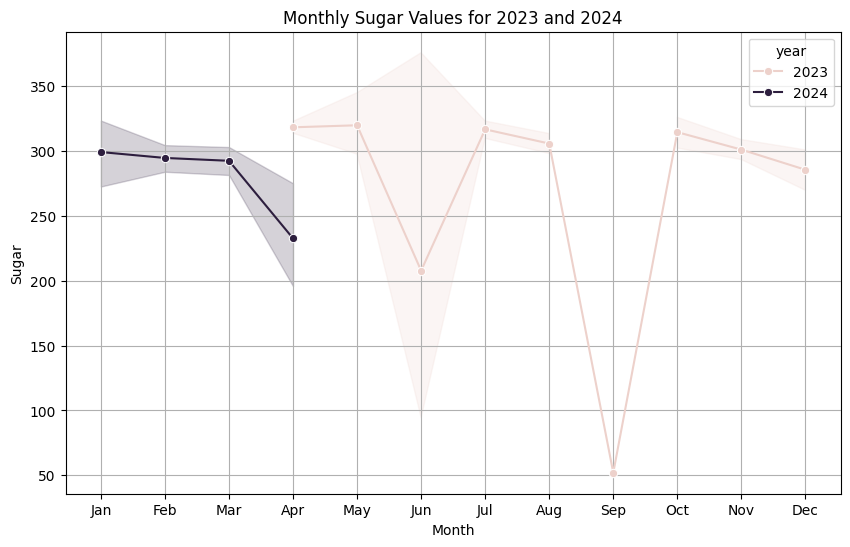

In [36]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_visits, x='month', y='sugar', hue='year', marker='o')

plt.xlabel('Month')
plt.ylabel('Sugar')
plt.title('Monthly Sugar Values for 2023 and 2024')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.savefig('monthly_sugar_values.png')
plt.show()


## Line Chart Month, Year, HBA1C

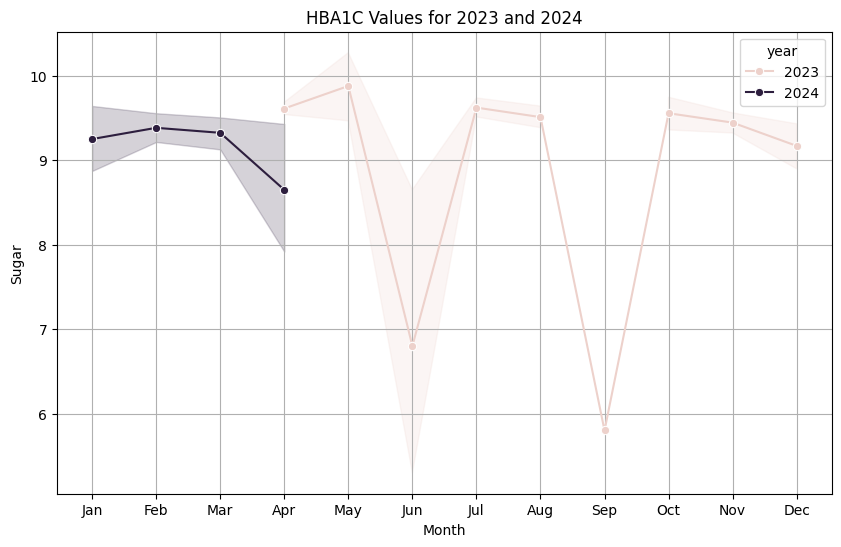

In [37]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_visits, x='month', y='hba1c', hue='year', marker='o')

plt.xlabel('Month')
plt.ylabel('Sugar')
plt.title('HBA1C Values for 2023 and 2024')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.savefig('hba1c_values.png')
plt.show()

## Line Chart Month, Year, BP

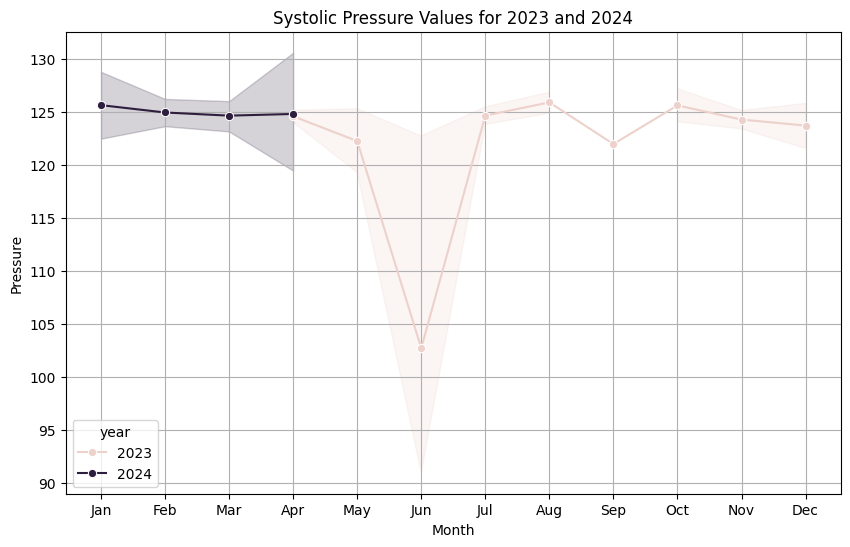

In [38]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_visits, x='month', y='systolic_pressure', hue='year', marker='o')

plt.xlabel('Month')
plt.ylabel('Pressure')
plt.title('Systolic Pressure Values for 2023 and 2024')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.savefig('bp_values.png')
plt.show()

## Histogram of Sugar

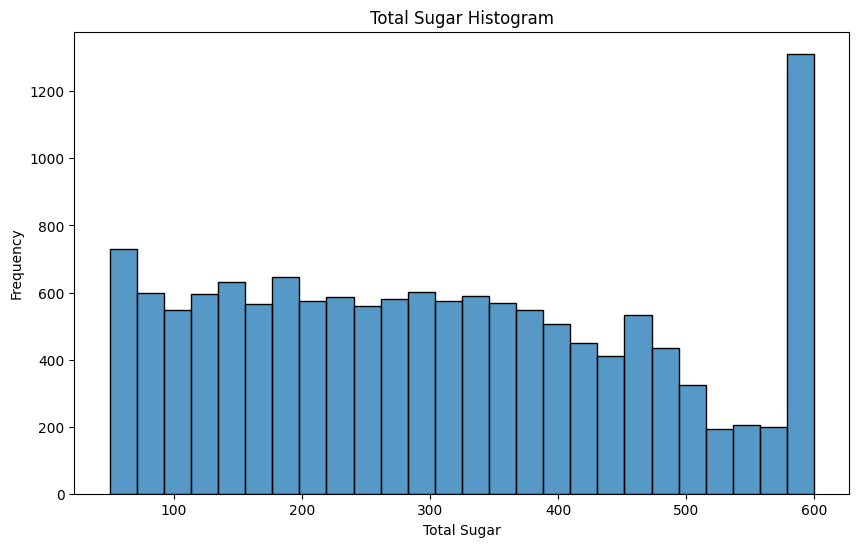

In [39]:
plt.figure(figsize=(10, 6))

sns.histplot(df_visits['sugar'])

plt.xlabel('Total Sugar')
plt.ylabel('Frequency')
plt.title('Total Sugar Histogram')
plt.savefig('sugar_histogram.png')
plt.show()

## Histogram of HBA1C

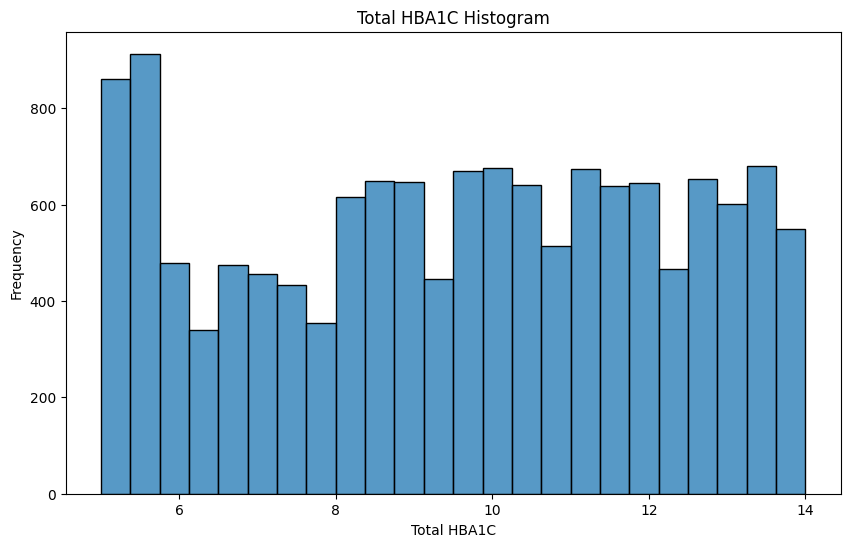

In [40]:
plt.figure(figsize=(10, 6))

sns.histplot(df_visits['hba1c'])

plt.xlabel('Total HBA1C')
plt.ylabel('Frequency')
plt.title('Total HBA1C Histogram')
plt.savefig('hba1c_histogram.png')
plt.show()

## Histogram of BP

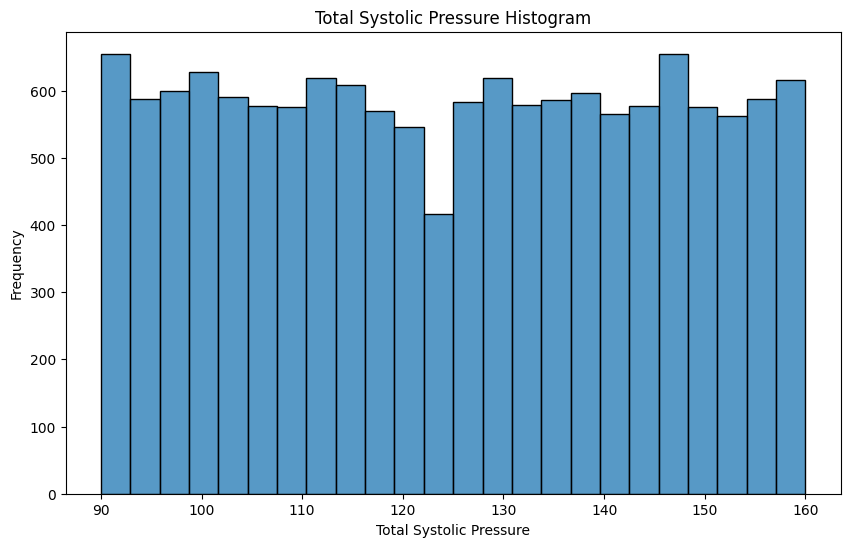

In [41]:
plt.figure(figsize=(10, 6))

sns.histplot(df_visits['systolic_pressure'])

plt.xlabel('Total Systolic Pressure')
plt.ylabel('Frequency')
plt.title('Total Systolic Pressure Histogram')
plt.savefig('systolic_pressure_histogram.png')
plt.show()

## Bar Plot of Sugar Categories

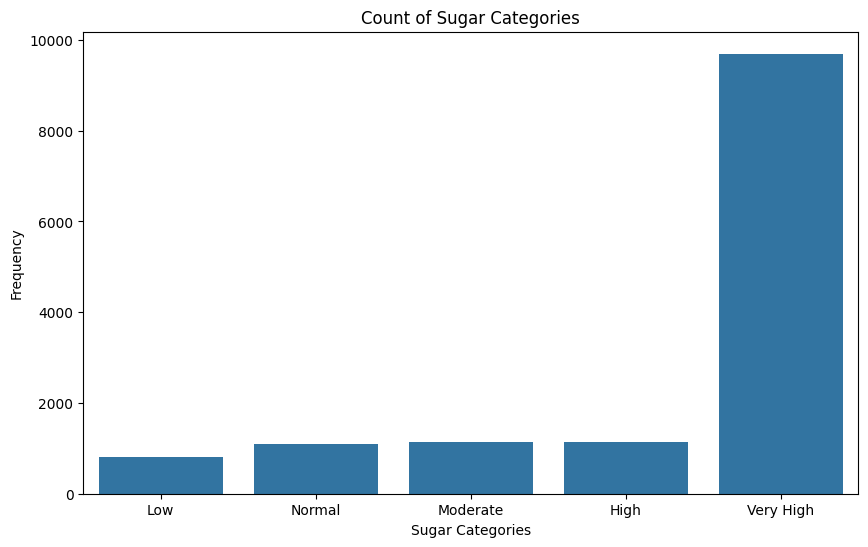

In [42]:
plt.figure(figsize=(10, 6))

sns.countplot(x = df_visits['sugar_cut'], data = df_visits)

plt.xlabel('Sugar Categories')
plt.ylabel('Frequency')
plt.title('Count of Sugar Categories')
plt.savefig('sugar_categories_bar.png')
plt.show()

## Bar Plot of HBA1C Categories

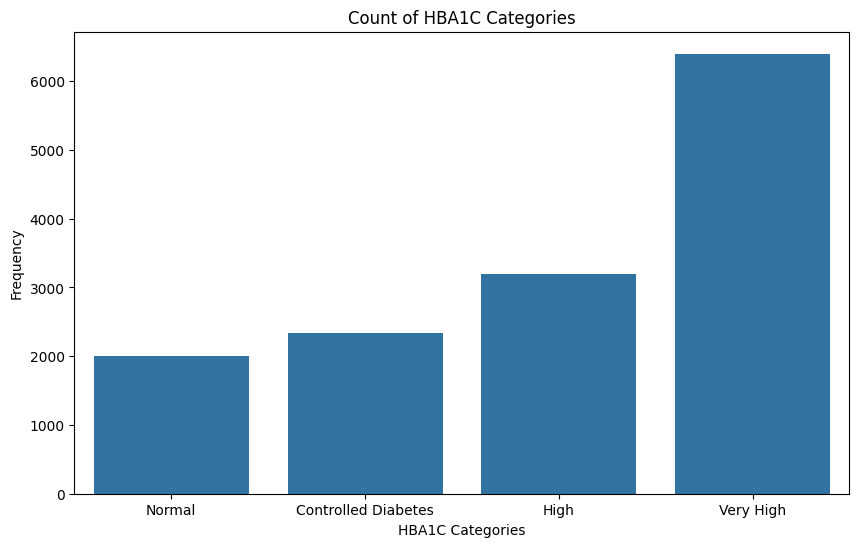

In [43]:
plt.figure(figsize=(10, 6))

sns.countplot(x = df_visits['hba1c_cut'], data = df_visits)

plt.xlabel('HBA1C Categories')
plt.ylabel('Frequency')
plt.title('Count of HBA1C Categories')
plt.savefig('hba1c_categories_bar.png')
plt.show()

## Bar Plot of BP Categories

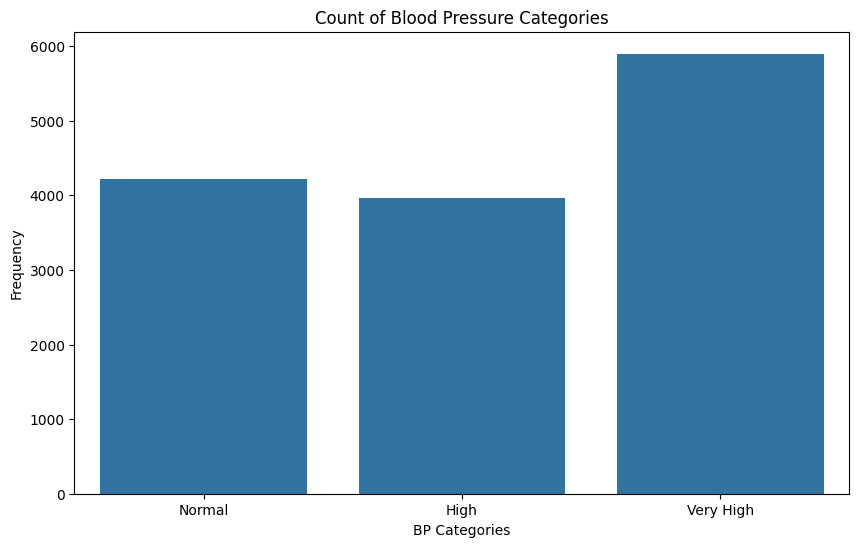

In [44]:
plt.figure(figsize=(10, 6))

sns.countplot(x = df_visits['bp_cut'], data = df_visits)

plt.xlabel('BP Categories')
plt.ylabel('Frequency')
plt.title('Count of Blood Pressure Categories')
plt.savefig('bp_categories_bar.png')
plt.show()

## Relationship Between Sugar And HBA1C (Scatterplot)

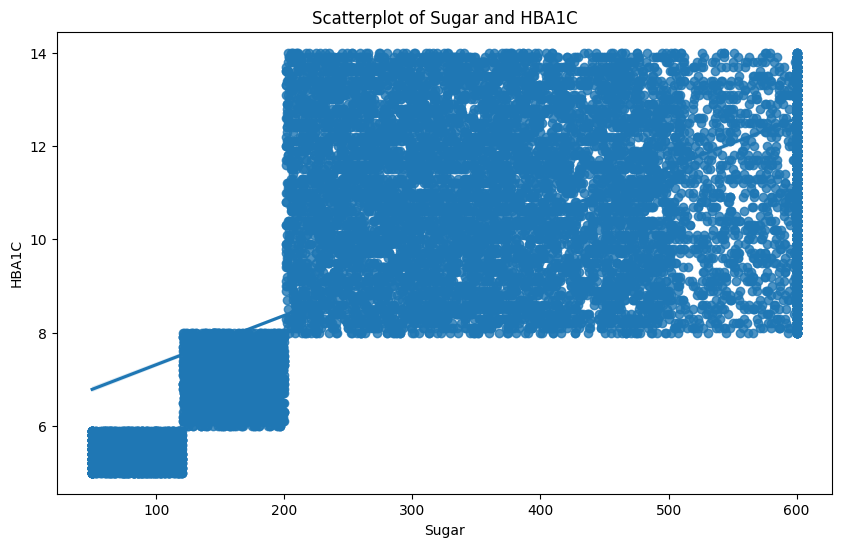

In [45]:
plt.figure(figsize=(10, 6))

sns.regplot(x = df_visits['sugar'], y = df_visits['hba1c'], data = df_visits)

plt.xlabel('Sugar')
plt.ylabel('HBA1C')
plt.title('Scatterplot of Sugar and HBA1C')
plt.savefig('sugar_hba1c_scatter.png')
plt.show()

## Box Plot of Total Sugar

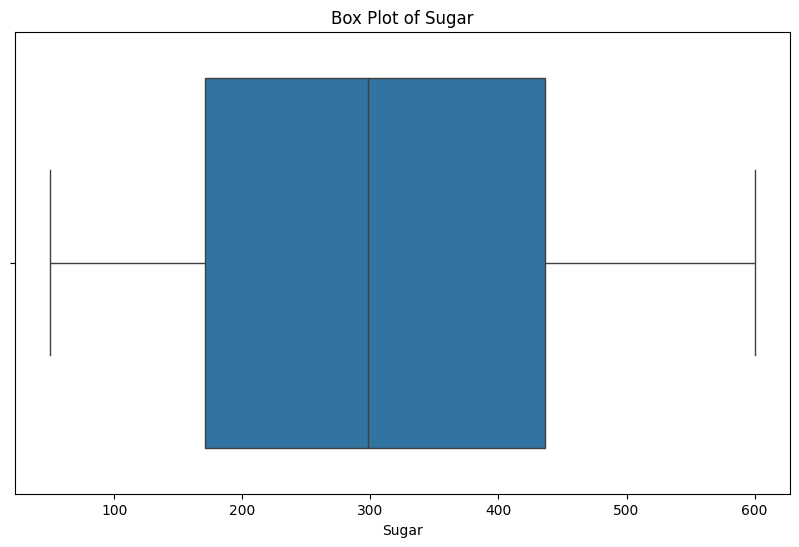

In [46]:
plt.figure(figsize=(10, 6))

sns.boxplot(x = df_visits['sugar'], data = df_visits)

plt.xlabel('Sugar')
plt.title('Box Plot of Sugar')
plt.savefig('sugar_box.png')
plt.show()

## Box Plot of HBA1C

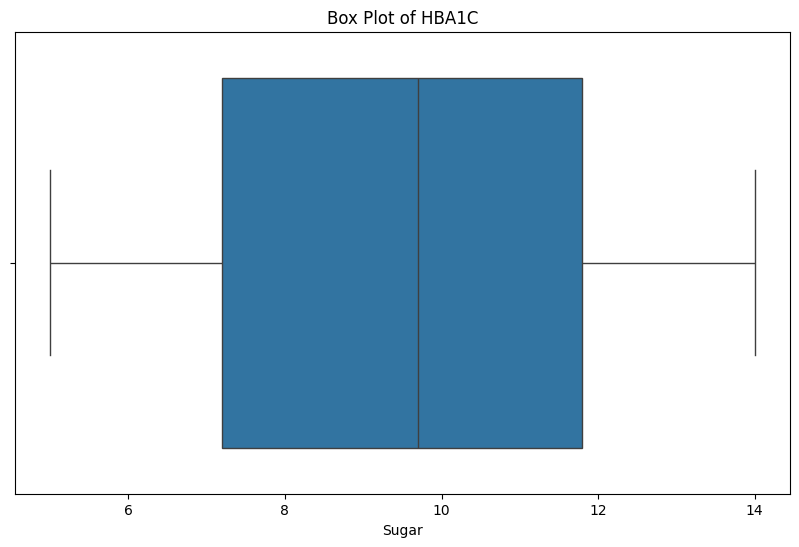

In [47]:
plt.figure(figsize=(10, 6))

sns.boxplot(x = df_visits['hba1c'], data = df_visits)

plt.xlabel('Sugar')
plt.title('Box Plot of HBA1C')
plt.savefig('hba1c_box.png')
plt.show()

## Box Plot of BP

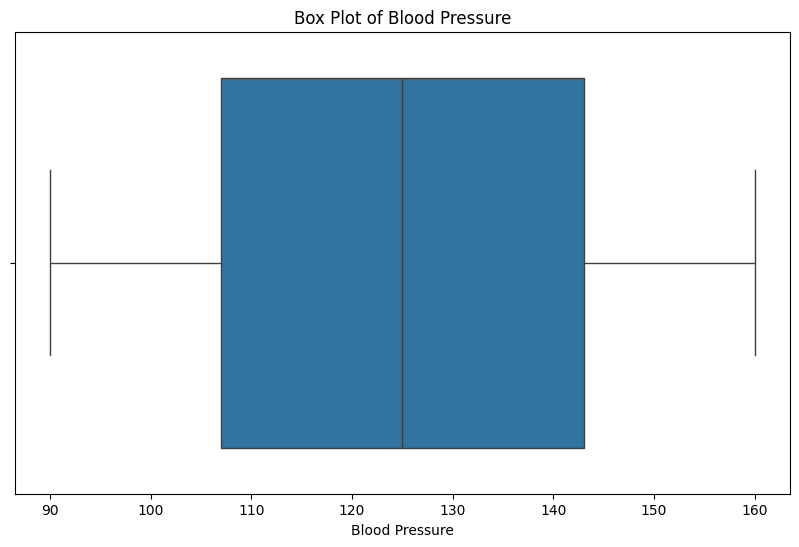

In [48]:
plt.figure(figsize=(10, 6))

sns.boxplot(x = df_visits['systolic_pressure'], data = df_visits)

plt.xlabel('Blood Pressure')
plt.title('Box Plot of Blood Pressure')
plt.savefig('bp_box.png')
plt.show()

## Finding the Correlation Between Sugar and HBA1C

In [49]:
correlation = df_visits[['sugar', 'hba1c']].corr()

In [50]:
correlation

,sugar,hba1c
sugar,1.000000,0.645261
hba1c,0.645261,1.000000


## Heatmap of Correlation Between Sugar and HBA1C

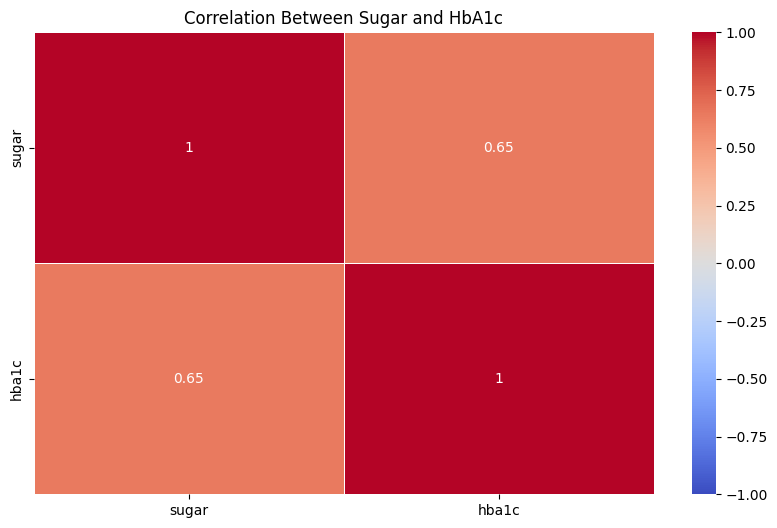

In [51]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=.5, vmin=-1, vmax=1)

plt.title('Correlation Between Sugar and HbA1c')
plt.savefig('correlation_heatmap.png')
plt.show()

## Finding whether there is any relationship between Age and HBA1C

In [52]:
df_patients.dtypes

patient_id                int64
date_of_birth    datetime64[ns]
aadhar_number             int64
mobile_number             int64
email                    object
first_name               object
last_name                object
full_name                object
gender                   object
height                    int64
weight                    int64
bmi                     float64
area                     object
latitude                float64
longitude               float64
dtype: object

In [53]:
reference_date = pd.Timestamp('2024-01-01')
df_patients['age'] = df_patients['date_of_birth'].apply(lambda dob: reference_date.year - dob.year - ((reference_date.month, reference_date.day) < (dob.month, dob.day)))



In [54]:
df_patients

,patient_id,date_of_birth,aadhar_number,mobile_number,email,first_name,last_name,full_name,gender,height,weight,bmi,area,latitude,longitude,age
0,1000,1957-07-02,254734595276,912998937864,achang@example.org,Eswar,Rajendran,Mr. Eswar Rajendran,Male,165,94,34.5,Alwarpet,13.033,80.251,66
1,1001,1980-09-16,450990877668,913770928150,tammy76@example.com,Indra,Chokkalingam,Ms. Indra Chokkalingam,Female,151,74,32.5,Guindy,13.005,80.219,43
2,1002,1969-12-04,585965453521,911664078988,nhoward@example.net,Swathi,Iyyappan,Ms. Swathi Iyyappan,Female,162,88,33.5,Adyar,13.006,80.257,54
3,1003,1979-11-19,842467933153,911027314078,juancampos@example.net,Gopal,Palanisamy,Mr. Gopal Palanisamy,Male,179,93,29.0,Egmore,13.078,80.258,44
4,1004,1997-01-04,665339009112,918904122631,vanessa89@example.org,Fathima,Thirunavukkarasu,Ms. Fathima Thirunavukkarasu,Female,151,99,43.4,Nungambakkam,13.059,80.239,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5995,1997-06-12,461487533791,919081288137,rschroeder@example.com,Lavanya,Devendran,Ms. Lavanya Devendran,Female,168,72,25.5,Adyar,13.006,80.257,26
4996,5996,1938-11-11,698100313416,916029690190,carrie65@example.com,Uma,Hemachandran,Ms. Uma Hemachandran,Female,152,73,31.6,Ambattur,13.101,80.162,85
4997,5997,1940-12-19,717551173697,911119299308,lawrencediaz@example.net,Dinesh,Indrakumar,Mr. Dinesh Indrakumar,Male,154,61,25.7,Chengalpattu,12.697,79.982,83
4998,5998,1959-03-27,906542564228,915000662532,jodineal@example.net,Saraswathi,Ganesan,Ms. Saraswathi Ganesan,Female,167,77,27.6,Kodambakkam,13.051,80.230,64


In [55]:
df_visits.dtypes

patient_id                     int64
visited_date          datetime64[ns]
sugar                          int64
hba1c                        float64
systolic_pressure              int64
diastolic_pressure             int64
sugar_cut                   category
hba1c_cut                   category
bp_cut                      category
year                           int32
month                          int32
dtype: object

In [56]:
# Calculate the average HbA1c for each patient
avg_hba1c = df_visits.groupby('patient_id')['hba1c'].mean().reset_index()


In [57]:
avg_hba1c

,patient_id,hba1c
0,1000,12.650000
1,1001,6.800000
2,1002,12.175000
3,1003,10.600000
4,1004,11.700000
...,...,...
4995,5995,11.566667
4996,5996,10.100000
4997,5997,11.100000
4998,5998,5.800000


In [58]:
avg_hba1c.rename(columns={'hba1c': 'avg_hba1c'}, inplace=True)

In [59]:
avg_hba1c

,patient_id,avg_hba1c
0,1000,12.650000
1,1001,6.800000
2,1002,12.175000
3,1003,10.600000
4,1004,11.700000
...,...,...
4995,5995,11.566667
4996,5996,10.100000
4997,5997,11.100000
4998,5998,5.800000


In [60]:
# Merge the average HbA1c data with df_patients
df_patients = pd.merge(df_patients, avg_hba1c, on='patient_id')

In [61]:
df_patients

,patient_id,date_of_birth,aadhar_number,mobile_number,email,first_name,last_name,full_name,gender,height,weight,bmi,area,latitude,longitude,age,avg_hba1c
0,1000,1957-07-02,254734595276,912998937864,achang@example.org,Eswar,Rajendran,Mr. Eswar Rajendran,Male,165,94,34.5,Alwarpet,13.033,80.251,66,12.650000
1,1001,1980-09-16,450990877668,913770928150,tammy76@example.com,Indra,Chokkalingam,Ms. Indra Chokkalingam,Female,151,74,32.5,Guindy,13.005,80.219,43,6.800000
2,1002,1969-12-04,585965453521,911664078988,nhoward@example.net,Swathi,Iyyappan,Ms. Swathi Iyyappan,Female,162,88,33.5,Adyar,13.006,80.257,54,12.175000
3,1003,1979-11-19,842467933153,911027314078,juancampos@example.net,Gopal,Palanisamy,Mr. Gopal Palanisamy,Male,179,93,29.0,Egmore,13.078,80.258,44,10.600000
4,1004,1997-01-04,665339009112,918904122631,vanessa89@example.org,Fathima,Thirunavukkarasu,Ms. Fathima Thirunavukkarasu,Female,151,99,43.4,Nungambakkam,13.059,80.239,26,11.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5995,1997-06-12,461487533791,919081288137,rschroeder@example.com,Lavanya,Devendran,Ms. Lavanya Devendran,Female,168,72,25.5,Adyar,13.006,80.257,26,11.566667
4996,5996,1938-11-11,698100313416,916029690190,carrie65@example.com,Uma,Hemachandran,Ms. Uma Hemachandran,Female,152,73,31.6,Ambattur,13.101,80.162,85,10.100000
4997,5997,1940-12-19,717551173697,911119299308,lawrencediaz@example.net,Dinesh,Indrakumar,Mr. Dinesh Indrakumar,Male,154,61,25.7,Chengalpattu,12.697,79.982,83,11.100000
4998,5998,1959-03-27,906542564228,915000662532,jodineal@example.net,Saraswathi,Ganesan,Ms. Saraswathi Ganesan,Female,167,77,27.6,Kodambakkam,13.051,80.230,64,5.800000


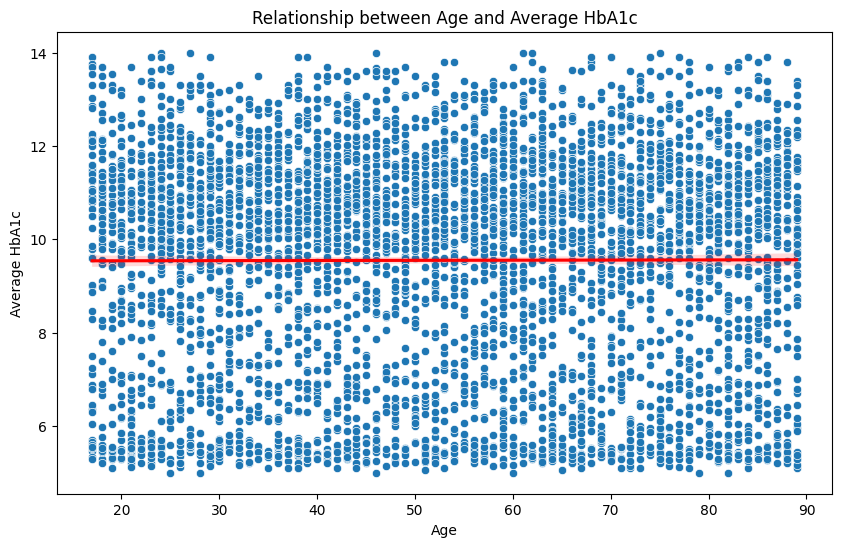

In [62]:
# The relationship between age and average HbA1c
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='avg_hba1c', data=df_patients)
sns.regplot(x='age', y='avg_hba1c', data=df_patients, scatter=False, color='r')
plt.xlabel('Age')
plt.ylabel('Average HbA1c')
plt.title('Relationship between Age and Average HbA1c')
plt.show()

In [63]:
df_visits.columns

Index(['patient_id', 'visited_date', 'sugar', 'hba1c', 'systolic_pressure',
       'diastolic_pressure', 'sugar_cut', 'hba1c_cut', 'bp_cut', 'year',
       'month'],
      dtype='object')

## Statistical Analysis - Chi Squared Test

- The chi-squared tests are used to test the independence between categorical variables
- It is used to measure the departure from the mean with respect to category counts.
- The statistic that measure the extent to which results depart from the null expectation of independence is the chi-squared statistic
- chi-squared statistic = [observed - expected value] / [sqrt of expected value]

In [64]:
# Create a contingency table
contingency_table = pd.crosstab(df_visits['sugar_cut'], df_visits['hba1c_cut'])

print("Contingency Table:")
print(contingency_table)

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nResults of Chi-squared Test:")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Interpret the results
alpha = 0.05
if p < alpha:
    print("\nThere is a significant association between sugar_cut and hba1c_cut.")
else:
    print("\nThe association between sugar_cut and hba1c_cut is not significant.")


Contingency Table:
hba1c_cut  Normal  Controlled Diabetes  High  Very High
sugar_cut                                              
Low           758                    0     0          0
Normal       1022                    0     0          0
Moderate       22                 1124     0          0
High           19                 1113     0          0
Very High       0                   97  3200       6399

Results of Chi-squared Test:
Chi-squared statistic: 26263.197169081344
P-value: 0.0
Degrees of freedom: 12
Expected frequencies:
[[ 100.35756871  128.62963502  176.35596917  352.6568271 ]
 [ 135.31060055  173.42940236  237.77810092  475.48189618]
 [ 151.72793369  194.47171732  266.62789007  533.17245892]
 [ 149.87436382  192.09597208  263.37065581  526.65900829]
 [1283.72953323 1645.37327323 2255.86738403 4511.02980951]]

There is a significant association between sugar_cut and hba1c_cut.


## Interpretation of Analytical Results

* There is strong correlaton between sugar and HBA1C
* The correlation between high and low BP are not checked since they keep changing
* The sugar values are skewed towards high sugar levels
* The HBA1C levels are skewed towards high HBA1C levels
* The HBA1C is equally distributed among people of all ages
* The BP values are almost normally distributed
* The visualizations indicate that there are more patients with higher HBA1C and Sugar
* The chi-square contingency report indicates that there is significant association between sugar and hba1c